In [42]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [43]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12343784674532411225
 xla_global_id: -1]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [45]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import csv
df = pd.read_csv('toxic.csv', sep=',', encoding='latin-1', error_bad_lines=False, lineterminator='\n'
                ,usecols =['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'])


In [3]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
165930,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0.0,0.0
165931,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0.0,0.0
165932,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0.0,0.0
165933,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0.0,0.0


In [4]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

EDA

In [5]:
df.isnull().sum()

id               1536
comment_text     5052
toxic            5992
severe_toxic     6199
obscene          6308
threat           6386
insult           6419
identity_hate    6755
dtype: int64

In [50]:
#df.drop_duplicates(inplace=True)

In [4]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159169 entries, 0 to 165934
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159169 non-null  object
 1   comment_text   159169 non-null  object
 2   toxic          159169 non-null  object
 3   severe_toxic   159169 non-null  object
 4   obscene        159169 non-null  object
 5   threat         159169 non-null  object
 6   insult         159169 non-null  object
 7   identity_hate  159169 non-null  object
dtypes: object(8)
memory usage: 10.9+ MB


In [8]:
df['toxic'].value_counts()

0                                                                                                                                                                                                                                                                                                                                                                                                                      143587
1                                                                                                                                                                                                                                                                                                                                                                                                                       15279
 12 march (UTC)"                                                                                                                                                            

In [54]:
df['threat'].value_counts()

0                                                                                           142720
0.0                                                                                          15879
1                                                                                              424
1.0                                                                                             56
 well                                                                                            2
                                                                                             ...  
 in FrontPageMag by Jacob Laksin. He has come under a lot of heat from the SPLC                  1
 which is my married name. This strange person McGeddon                                          1
 thereby helping the blocked editor to evade the block                                           1
 nor can you expect everyone to use a screen with the same resolution. This is a problem         1
 enter it 

In [55]:
df['toxic'].str.contains('[A-Za-z]')

0         False
1         False
2         False
3         False
4         False
          ...  
165930    False
165931    False
165932    False
165933    False
165934    False
Name: toxic, Length: 159169, dtype: bool

In [56]:
#df = df[df['toxic'].str.contains('[A-Z]+') == False]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159169 entries, 0 to 165934
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159169 non-null  object
 1   comment_text   159169 non-null  object
 2   toxic          159169 non-null  object
 3   severe_toxic   159169 non-null  object
 4   obscene        159169 non-null  object
 5   threat         159169 non-null  object
 6   insult         159169 non-null  object
 7   identity_hate  159169 non-null  object
dtypes: object(8)
memory usage: 10.9+ MB


In [58]:
# Select the columns of interest
#columns_to_check = ['toxic', 'severe_toxic', 'obscene','threat','insult','identity_hate']

# Filter rows where all selected columns have numeric values
#df = df[df[columns_to_check].applymap(lambda x: str(x).isnumeric()).all(axis=1)]


In [59]:
#df[df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].str().isnumeric()]

In [9]:
df[df['toxic'].str.isnumeric()]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
165930,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0.0,0.0
165931,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0.0,0.0
165932,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0.0,0.0
165933,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0.0,0.0


In [5]:
df = df[df['toxic'].str.isnumeric()]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158866 entries, 0 to 165934
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             158866 non-null  object
 1   comment_text   158866 non-null  object
 2   toxic          158866 non-null  object
 3   severe_toxic   158866 non-null  object
 4   obscene        158866 non-null  object
 5   threat         158866 non-null  object
 6   insult         158866 non-null  object
 7   identity_hate  158866 non-null  object
dtypes: object(8)
memory usage: 10.9+ MB


In [12]:
df.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
#df.dropna(inplace=True)

In [28]:
df['toxic'].value_counts()

0    127387
1     13557
Name: toxic, dtype: int64

In [18]:
df['severe_toxic'].value_counts()

0    157271
1      1595
Name: severe_toxic, dtype: int64

In [6]:
cat= ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [7]:
for i in cat:
    df[i]=df[i].astype(int)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158866 entries, 0 to 165934
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             158866 non-null  object
 1   comment_text   158866 non-null  object
 2   toxic          158866 non-null  int32 
 3   severe_toxic   158866 non-null  int32 
 4   obscene        158866 non-null  int32 
 5   threat         158866 non-null  int32 
 6   insult         158866 non-null  int32 
 7   identity_hate  158866 non-null  int32 
dtypes: int32(6), object(2)
memory usage: 7.3+ MB


<IPython.core.display.Javascript object>


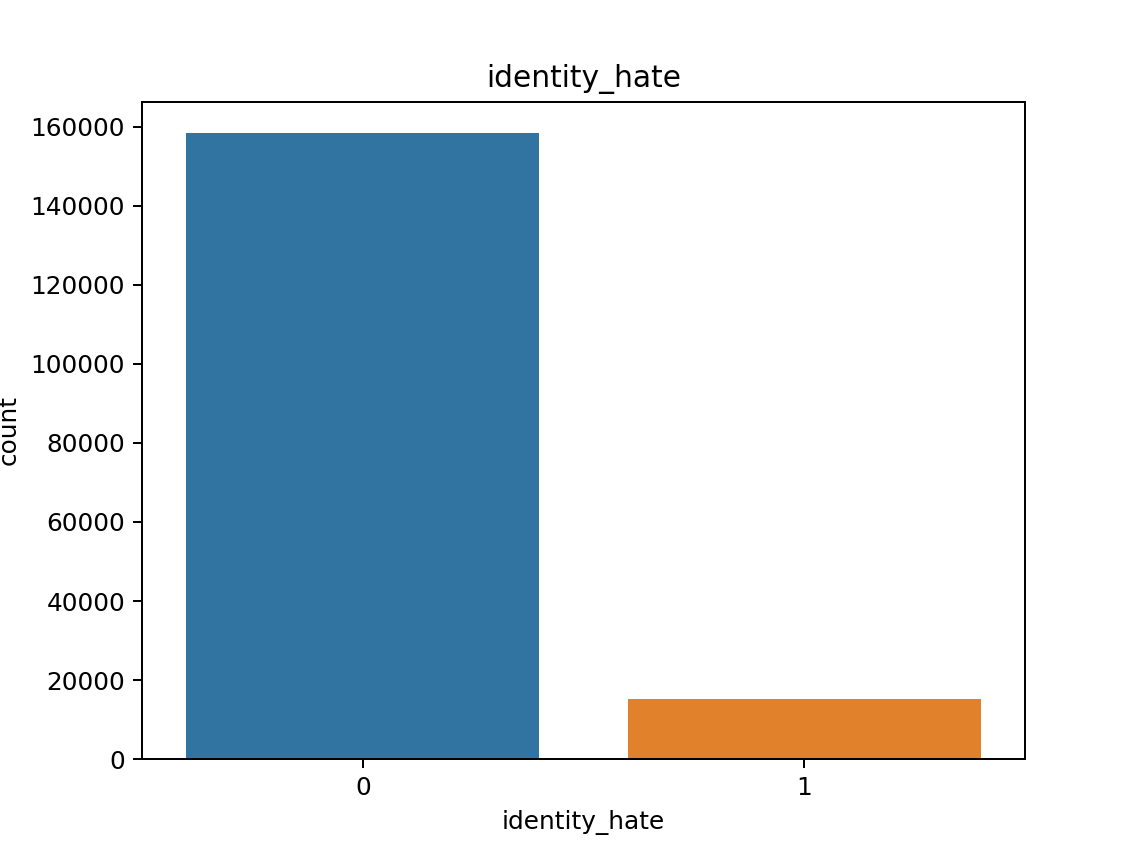

In [25]:
cat_val = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
for c in cat_val:
  sns.countplot(x=c,data= df)
  plt.title(c)
  plt.show()

In [26]:
import nltk
nltk.data.path.append('path_to_extracted_data_directory')

In [27]:
import nltk
import re
from nltk.corpus import stopwords

In [29]:
!pip install nltk

In [51]:
#nltk.download('stopwords')

In [36]:
stopwords

<WordListCorpusReader in 'C:\\Users\\ygred\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>

In [8]:
import re
stopwords = ["the", "and", "is", "on", "in", "if", "for", "a", "an", "of", "or", "to", "it", "you", "your"]

In [9]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters, punctuation marks, and newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)

    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stopwords)

    return text.lower()

In [33]:
texts = [
    "\nMore\nI can't make any       real sugges%%%%%tions on improvement - I wondered if the section statistics should b|e later on, or a subsect\nion of 'types of accidents'  -I think the references may need tidying so that they are all in the exact same format ie date format etc I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport"
]
cleaned_texts = [clean_text(text) for text in texts]
print(cleaned_texts)

['more i cant make any real suggestions improvement i wondered section statistics should be later subsect ion types accidents i think references may need tidying so that they are all exact same format ie date format etc i can do that later noone else does first have any preferences formatting style references want do yourself please let me know there appears be backlog articles review so i guess there may be delay until reviewer turns up its listed relevant form eg wikipediagoodarticlenominationstransport']


In [10]:
df['comment_text'] = df['comment_text'].apply(clean_text)
df['comment_text'].head()

0    explanation why edits made under my username h...
1    daww he matches this background colour im seem...
2    hey man im really not trying edit war its just...
3    more i cant make any real suggestions improvem...
4    sir are my hero any chance remember what page ...
Name: comment_text, dtype: object

In [11]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why edits made under my username h...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying edit war its just...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions improvem...,0,0,0,0,0,0
4,0001d958c54c6e35,sir are my hero any chance remember what page ...,0,0,0,0,0,0


In [73]:
df.iloc[2]['comment_text']

'hey man im really not trying edit war its just that this guy constantly removing relevant information talking me through edits instead my talk page he seems care more about formatting than actual info'

#Data Visualization

In [36]:
# Function to generate word cloud
def generate_wordcloud(text,Title):
    wordcloud = WordCloud(width=800, height=400,stopwords=set(STOPWORDS), background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()

In [37]:
target_labels= [col for col in df.columns if df[col].dtypes == 'int64']
target_labels

[]

#Visualizing the Category of Dataset

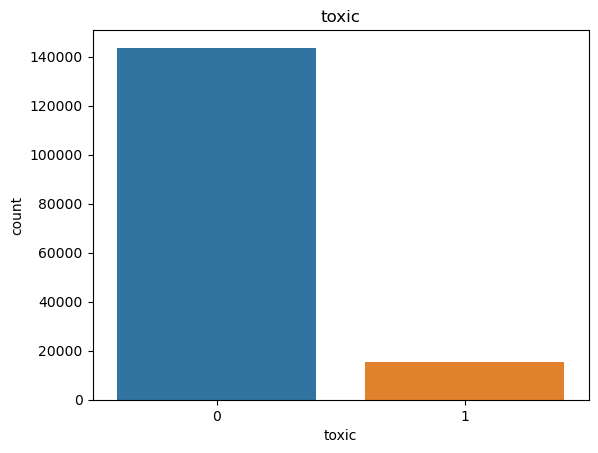

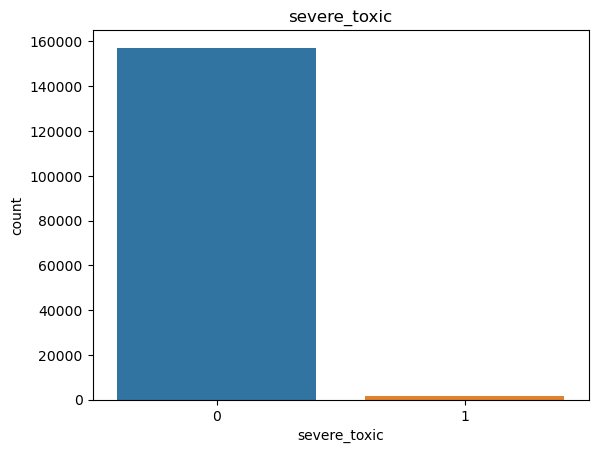

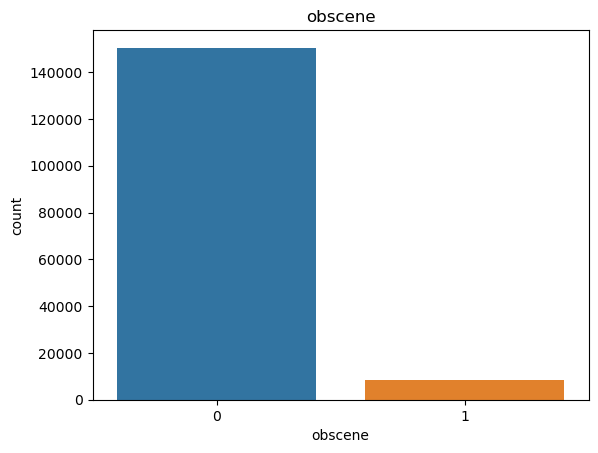

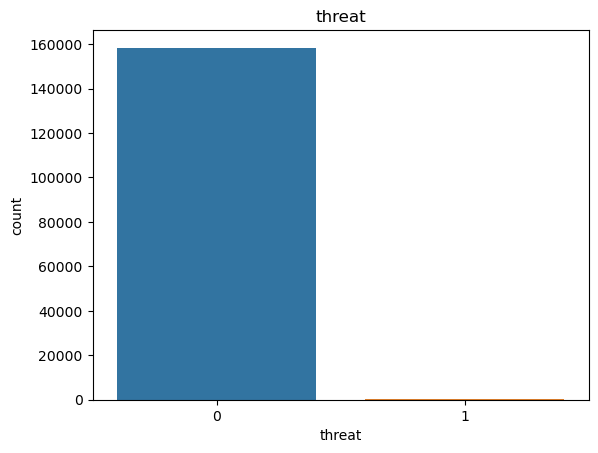

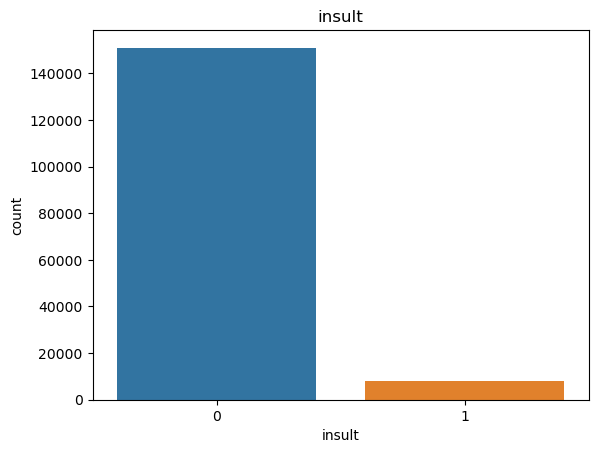

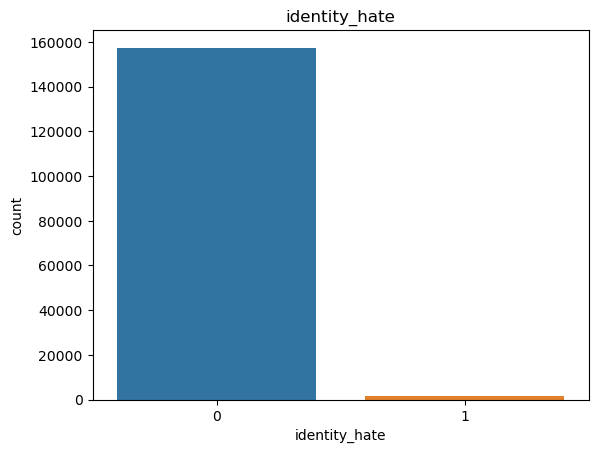

In [76]:
cat_val = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
for c in cat_val:
  sns.countplot(x=c,data= df)
  plt.title(c)
  plt.show()

In [82]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.3 MB/s eta 0:00:00


In [83]:
from wordcloud import WordCloud, STOPWORDS

In [84]:
df[df['toxic'] == 1]['comment_text'].describe()

count                                             15279
unique                                            15158
top       graceful slick non other than ungraceful dick
freq                                                  8
Name: comment_text, dtype: object

In [85]:
df[df['severe_toxic'] == 1]['comment_text'].describe()

count                  1595
unique                 1592
top       fuck off fuck off
freq                      2
Name: comment_text, dtype: object

In [86]:
df[df['obscene'] == 1]['comment_text'].describe()

count                                              8441
unique                                             8380
top       graceful slick non other than ungraceful dick
freq                                                  5
Name: comment_text, dtype: object

In [87]:
df[df['threat'] == 1]['comment_text'].describe()

count                                  478
unique                                 470
top       i will ki ll wear skin like robe
freq                                     2
Name: comment_text, dtype: object

In [88]:
df[df['insult'] == 1]['comment_text'].describe()

count                                              7872
unique                                             7826
top       graceful slick non other than ungraceful dick
freq                                                  4
Name: comment_text, dtype: object

In [89]:
df[df['identity_hate'] == 1]['comment_text'].describe()

count                    1404
unique                   1395
top       userabd muslim scum
freq                        3
Name: comment_text, dtype: object

In [90]:
df[df['toxic'] == 0]['comment_text'].describe()

count     143587
unique    142380
top             
freq          82
Name: comment_text, dtype: object

In [91]:
df[df['severe_toxic'] == 0]['comment_text'].describe()

count     157271
unique    155934
top             
freq          82
Name: comment_text, dtype: object

In [92]:
df['comment_text'].head(100)

0     explanation why edits made under my username h...
1     daww he matches this background colour im seem...
2     hey man im really not trying edit war its just...
3     more i cant make any real suggestions improvem...
4     sir are my hero any chance remember what page ...
                            ...                        
95             hi thanks our kind words see around talk
96    collusion poker this regarded as most heinous ...
97    thanks much however its been resolved why that...
98    can do all youre doing right now but get usern...
99    however moonlite edit noted by golden daph was...
Name: comment_text, Length: 100, dtype: object

In [100]:
# Plot word clouds for each target label
for label in target_labels:
    text = ' '.join(df[df[label] == 1]['comment_text'].head(10000).values)
    generate_wordcloud(text,Title=label)
    plt.show()

#Non Toxic Comment

In [94]:
# Plot word clouds for each target label
for label in target_labels:
    text = ' '.join(df[df[label] == 0]['comment_text'].head(10000).values)
    generate_wordcloud(text,Title=label)

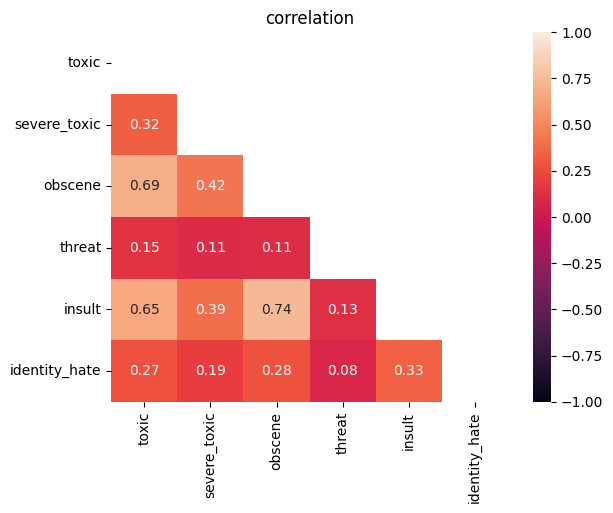

In [ ]:
sns.heatmap(df.corr(),vmin =-1,vmax=1,annot=True,mask = np.triu(df.corr()))
plt.title('correlation')
plt.show()

In [159]:
#df.to_csv('final.csv',index = False )

In [12]:
X = df['comment_text']
y= df.drop(['id','comment_text'],axis=1)

In [13]:
X

0         explanation why edits made under my username h...
1         daww he matches this background colour im seem...
2         hey man im really not trying edit war its just...
3         more i cant make any real suggestions improvem...
4         sir are my hero any chance remember what page ...
                                ...                        
165930    second time asking when view completely contra...
165931    should be ashamed yourself that horrible thing...
165932    spitzer umm theres no actual article prostitut...
165933    looks like was actually who put speedy have fi...
165934    i really dont think understand i came here my ...
Name: comment_text, Length: 158866, dtype: object

In [14]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
165930,0,0,0,0,0,0
165931,0,0,0,0,0,0
165932,0,0,0,0,0,0
165933,0,0,0,0,0,0


In [15]:
y.shape

(158866, 6)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state= 12)

In [48]:
X_train.shape,y_train.shape

((106440,), (106440, 6))

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
data = ['the dog and  cat','madein over']

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents into a bag-of-words representation
vectorizer.fit_transform(data)

# Get the feature names (words) in the vocabulary
vectorizer.get_feature_names_out(data)

counts = vectorizer.transform(data)
print(counts)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 5)	1
  (1, 3)	1
  (1, 4)	1


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents into a bag-of-words representation
X_train_tf = vectorizer.fit_transform(X_train)
X_test_processed = vectorizer.transform(X_test)
X_train_tf.shape

(106440, 165458)

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid = TfidfTransformer()
X_train_tfid = tfid.fit_transform(X_train_tf)
X_train_tfid.shape

(106440, 165458)

In [57]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

In [20]:
y_train.shape

(106440, 6)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.multioutput import MultiOutputClassifier  # For multi-label classification
from sklearn.multioutput import MultiOutputRegressor  # For multi-label regression
from sklearn.naive_bayes import MultinomialNB

# Create an instance of the MultinomialNB class
mnb = MultinomialNB()

clf = MultiOutputClassifier(mnb)  # Replace YourClassifier with the desired classifier
clf.fit(X_train_tfid, y_train)


MultiOutputClassifier(estimator=MultinomialNB())

In [23]:
# Make predictions
nb_prediction = clf.predict(X_test_processed)
nb_pred = clf.predict(X_train_tfid)

In [24]:
print(" Test Accuracy {0:.2f}%".format(100*accuracy_score(nb_prediction,y_test)))
print(" Train Accuracy {0:.2f}%".format(100*accuracy_score(nb_pred, y_train)))
print(classification_report(nb_prediction,y_test))

 Test Accuracy 90.13%
 Train Accuracy 89.95%
              precision    recall  f1-score   support

           0       0.21      0.97      0.34      1052
           1       0.03      0.38      0.05        34
           2       0.17      0.93      0.28       493
           3       0.01      0.20      0.01         5
           4       0.10      0.82      0.18       325
           5       0.01      0.38      0.03        16

   micro avg       0.15      0.92      0.27      1925
   macro avg       0.09      0.61      0.15      1925
weighted avg       0.17      0.92      0.29      1925
 samples avg       0.01      0.02      0.01      1925



In [60]:
params = {
    'scale_pos_weight': scale_pos_weight,}

In [ ]:
logreg_clf = LogisticRegression(random_state=42,class_weight = 'balanced')

clf = MultiOutputClassifier(logreg_clf)  # Replace YourClassifier with the desired classifier
clf.fit(X_train_tfid, y_train)

In [29]:
# Predicting Train and Test data
log_prediction = clf.predict(X_test_processed)
log_pred = clf.predict(X_train_tfid)

In [30]:
print(" Test Accuracy {0:.2f}%".format(100*accuracy_score(log_prediction,y_test)))
print(" Train Accuracy {0:.2f}%".format(100*accuracy_score(log_pred, y_train)))
print(classification_report(log_prediction,y_test))

 Test Accuracy 75.63%
 Train Accuracy 91.14%
              precision    recall  f1-score   support

           0       0.90      0.45      0.60      9928
           1       0.93      0.16      0.27      2979
           2       0.94      0.39      0.55      6784
           3       0.94      0.03      0.06      4503
           4       0.93      0.32      0.48      7362
           5       0.91      0.08      0.16      4874

   micro avg       0.92      0.29      0.44     36430
   macro avg       0.92      0.24      0.35     36430
weighted avg       0.92      0.29      0.41     36430
 samples avg       0.09      0.05      0.06     36430



In [111]:
#rf_clf = RandomForestClassifier()

#clf = MultiOutputClassifier(rf_clf)  # Replace YourClassifier with the desired classifier
#clf.fit(X_train_tfid, y_train)

In [ ]:
# Predicting Train and Test data
rf_prediction = clf.predict(X_test_processed)
rf_pred = clf.predict(X_train_tfid)

In [ ]:
print(" Test Accuracy {0:.2f}%".format(100*accuracy_score(rf_prediction,y_test)))
print(" Train Accuracy {0:.2f}%".format(100*accuracy_score(rf_pred, y_train)))
print(classification_report(rf_prediction,y_test))

In [ ]:
xg_clf = XGBClassifier()

clf = MultiOutputClassifier(xg_clf)  # Replace YourClassifier with the desired classifier
clf.fit(X_train_tfid, y_train)


####final decide model

In [ ]:
# Predicting Train and Test data
xg_prediction = clf.predict(X_test_processed)
xg_pred = clf.predict(X_train_tfid)

In [ ]:
print(" Test Accuracy {0:.2f}%".format(100*accuracy_score(xg_prediction,y_test)))
print(" Train Accuracy {0:.2f}%".format(100*accuracy_score(xg_pred, y_train)))
print(classification_report(xg_prediction,y_test))

##Deep Learning Model

In [ ]:
MAX_FEATURES = 5000 # number of words in the vocab

In [ ]:
from tensorflow.keras.layers import TextVectorization
import tensorflow as tf

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length= 500,
                               output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
vectorized_text

<tf.Tensor: shape=(43137, 500), dtype=int64, numpy=
array([[  33,    1,   63, ...,    0,    0,    0],
       [  83, 2148,  114, ...,    0,    0,    0],
       [ 245,  161, 1751, ...,    0,    0,    0],
       ...,
       [ 912,    6, 3410, ...,    0,    0,    0],
       [ 275,    1, 1367, ...,    0,    0,    0],
       [1817,  256,    2, ...,    0,    0,    0]])>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
X

1         just closure some gas after i voted at new yor...
7                                       use tools well talk
8                     cocksucker before piss around my work
9         alignment this subject which are contrary thos...
29                           come think comming back tosser
                                ...                        
344309    so how do tackle those that gang up against ju...
344324                 i have better idea who prankster now
344325    appear be alternate account supreme deliciousness
344328    both wpordinal station naming convention say s...
344333    strongly agree i believe there should be three...
Name: comment_text, Length: 43137, dtype: object

In [ ]:
y

,toxic,severe_toxic,obscene,threat,insult,identity_hate
1,0,0,0,0,0,0
7,0,0,0,0,0,0
8,1,1,1,0,1,0
9,0,0,0,0,0,0
29,1,0,0,0,0,0
...,...,...,...,...,...,...
344309,0,0,0,0,0,0
344324,0,0,0,0,0,0
344325,0,0,0,0,0,0
344328,0,0,0,0,0,0


In [ ]:
#!pip install transformers

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(1600)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [ ]:
train = dataset.take(int(len(dataset)*.6))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.2))

##Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(1, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='relu'))
# Final layer
model.add(Dense(6, activation='softmax'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          160032    
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 1)                 65        
                                                                 
 dense_13 (Dense)            (None, 2)                 4         
                                                                 
 dense_14 (Dense)            (None, 1)                 3         
                                                                 
 dense_15 (Dense)            (None, 6)                 12        
                                                      

In [ ]:
# Fit the model
#history = model.fit(vectorized_text, y, validation_split=0.33, epochs=1, batch_size=10)
history = model.fit(train, epochs=1, validation_data=val,batch_size=100)

1618/1618 [==============================] - 1160s 713ms/step - loss: 0.4513 - accuracy: 0.9106 - val_loss: 0.3010 - val_accuracy: 0.9950


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 68ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.0, Recall:0.0, Accuracy:0.22592592239379883


In [ ]:
history_Test = model.fit(test, epochs=1, validation_data=val)

270/270 [==============================] - 268s 992ms/step - loss: 0.2858 - accuracy: 0.9956 - val_loss: 0.2769 - val_accuracy: 0.9944


##Now lets import BERT model and get embeding vectors for few sample statements

In [41]:
X = df['comment_text']
y=df.drop(['id','comment_text'],axis=1)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

##Now lets import BERT model and get embeding vectors for few sample statements


In [43]:
!pip install tensorflow_text
!pip install -q tensorflow_text=2.13.0
!pip install tensorflow_text

ERROR: Invalid requirement: 'tensorflow_text=2.13.0'
Hint: = is not a valid operator. Did you mean == ?


In [63]:
#!pip install --upgrade tensorflow tensorflow-estimator

In [44]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [45]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [46]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.84351724, -0.5132727 , -0.88845736, ..., -0.7474883 ,
        -0.75314754,  0.91964495],
       [-0.87208354, -0.50543964, -0.94446665, ..., -0.85847497,
        -0.71745336,  0.88082975]], dtype=float32)>

#Model Building

In [47]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.2, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(6, activation='relu', name="output")(l)
l = tf.keras.layers.Dense(6, activation='softmax', name="class_output")(l)  # Add softmax activation for multi-class classification
# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_word_ids': (None,                                           
                              128),                                                               
                              'input_type_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [49]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [50]:
model.fit(X_train, y_train, epochs=1,batch_size =30)

1079/1079 [==============================] - 353s 315ms/step - loss: 0.2556 - accuracy: 0.9239 - precision: 0.0077 - recall: 0.0053


In [51]:
model.evaluate(X_test, y_test)

338/338 [==============================] - 120s 351ms/step - loss: 0.1472 - accuracy: 0.9541 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.14716258645057678, 0.9540565609931946, 0.0, 0.0]

In [52]:
y_predicted = model.predict(X_test)
#y_predicted = y_predicted.flatten()

338/338 [==============================] - 115s 340ms/step


In [53]:
y_predicted

array([[0.45627138, 0.07788804, 0.22004025, 0.01269655, 0.20139967,
        0.03170411],
       [0.4634338 , 0.07592829, 0.21775705, 0.01161633, 0.2014155 ,
        0.02984903],
       [0.45494938, 0.07824979, 0.22045234, 0.01290489, 0.20138809,
        0.0320555 ],
       ...,
       [0.45942742, 0.07702441, 0.21904458, 0.0122106 , 0.20141639,
        0.0308766 ],
       [0.45576078, 0.07802774, 0.22019975, 0.01277668, 0.20139553,
        0.03183949],
       [0.45899835, 0.07714181, 0.21918088, 0.01227572, 0.20141499,
        0.03098816]], dtype=float32)

In [56]:
y_pred = (y_predicted > 0.5)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1276
           1       0.00      0.00      0.00       160
           2       0.00      0.00      0.00       728
           3       0.00      0.00      0.00        42
           4       0.00      0.00      0.00       663
           5       0.00      0.00      0.00        96

   micro avg       0.00      0.00      0.00      2965
   macro avg       0.00      0.00      0.00      2965
weighted avg       0.00      0.00      0.00      2965
 samples avg       0.00      0.00      0.00      2965



##Deployment

In [33]:
import pickle
# open a file, where you ant to store the data
file = open('Toxic_classification_log.pkl', 'wb') #opened for writing binary code.
# Fit the MultiOutputClassifier model
#model = MultiOutputClassifier(XGBClassifier())
logreg_clf = LogisticRegression(random_state=42,class_weight = 'balanced')
clf = MultiOutputClassifier(logreg_clf)  # Replace YourClassifier with the desired classifier
model = clf.fit(X_train_tfid, y_train)
pickle.dump(model,file)
file.close()

In [34]:
!pip install streamlit

In [35]:
import pickle
with open('Toxic_classification_log.pkl', 'rb') as f:
    model = pickle.load(f)

In [164]:
ddf.isna().sum()

id                 0
comment_text     902
toxic              3
severe_toxic       3
obscene            3
threat             3
insult             3
identity_hate      3
dtype: int64

In [165]:
ddf.dropna(inplace=True)

In [166]:
ddf

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Why the edits made under my username Hardcore ...,just closure some gas after i voted at new yor...,0.0,0.0,0.0,0.0,0.0,0.0
1,Congratulations from me as well,use tools well talk,0.0,0.0,0.0,0.0,0.0,0.0
2,"""0002bcb3da6cb337""",cocksucker before piss around my work,1.0,1.0,1.0,0.0,1.0,0.0
3,"""00040093b2687caa""",alignment this subject which are contrary thos...,0.0,0.0,0.0,0.0,0.0,0.0
4,Don't look,come think comming back tosser,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
43135,"""268dc27badae0ea8""",so how do tackle those that gang up against ju...,0.0,0.0,0.0,0.0,0.0,0.0
43136,"""269fd86a5a73579b""",i have better idea who prankster now,0.0,0.0,0.0,0.0,0.0,0.0
43137,"""26a4827441d6024d""",appear be alternate account supreme deliciousness,0.0,0.0,0.0,0.0,0.0,0.0
43138,"""26ae52ba772cacaf""",both wpordinal station naming convention say s...,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
%%writefile app.py
import pickle
import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

# Load the trained model
with open('Toxic_classification_log.pkl', 'rb') as f:
    model = pickle.load(f)

# Load your dataset (assuming it's in a DataFrame format)
# Replace this with your actual dataset loading code
# Example: df = pd.read_csv('your_dataset.csv')
df = pd.read_csv('toxic.csv', sep=',', encoding='latin-1', error_bad_lines=False, lineterminator='\n',
                usecols=['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
                         'insult', 'identity_hate'])
df.dropna(inplace=True)
df = df[df['toxic'].str.isnumeric()]
cat= ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
for i in cat:
    df[i]=df[i].astype(int)
    # Define a function to clean text
    import re
stopwords = ["the", "and", "is", "on", "in", "if", "for", "a", "an", "of", "or", "to", "it", "you", "your"]
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # Remove web links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters, punctuation marks, and newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word.lower() not in stopwords)
    return text.lower()

df['comment_text'] = df['comment_text'].apply(clean_text)

X = df['comment_text']
y = df.drop(['id', 'comment_text'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

# Create a TfidfVectorizer and fit it on the training documents
vectorizer = TfidfVectorizer()
X_train_tf = vectorizer.fit_transform(X_train)

# Create a TfidfTransformer and transform the training data
tfidf_transformer = TfidfTransformer()
X_train_tfid = tfidf_transformer.fit_transform(X_train_tf)

# Define the XGBoost classifier
logreg_clf = LogisticRegression(random_state=42, class_weight='balanced', tol=0.001, C=1.0)
clf = MultiOutputClassifier(logreg_clf)  # Replace YourClassifier with the desired classifier
model = clf.fit(X_train_tfid, y_train)

# Define a Streamlit function to make predictions
def score_comment(comment):
    # Transform the input comment using the same vectorizer and transformer
    vectorized_comment = vectorizer.transform([comment])
    # Make predictions with the trained model
    results = clf.predict(vectorized_comment)
    text = ''
    for idx, col in enumerate(y.columns):
        # Convert results to float for comparison
        prediction = float(results[0][idx])
        text += '{}: {}\n'.format(col, prediction > 0.5)
    return text

def main():
    st.title("Toxic Comment Classification")
    comment = st.text_input("Enter a comment:")
    # Add a button to trigger predictions
    if st.button("Predict"):
        if comment:
            prediction = score_comment(comment)
            st.text("Predictions:")
            st.text(prediction)

if __name__ == '__main__':
    main()


Overwriting app.py


In [50]:
!streamlit run app.py

^C
